In [1]:
import sys
import os
sys.path.append('../gNN')
import torch as th
import graph1d.generate_normalized_graphs as gng
import graph1d.generate_dataset as dset
import tools.io_utils as io
from network1d.meshgraphnet import MeshGraphNet
import json
import shutil
import numpy as np
import pathlib
from network1d.rollout import rollout
import tools.plot_tools as pt
import matplotlib.pyplot as plt
import network1d.tester as tester

In [2]:
# load the model and the dataset

path = '../models/28.01.2024_12.22.53/'

dataset, gnn_model, params = tester.get_dataset_and_gnn(path, graphs_folder= 'graphs_rm/' ,data_location='../data/')

if os.path.exists('results'):
    shutil.rmtree('results')


../data/graphs_rm/


Loading graphs: 100%|██████████| 278/278 [00:02<00:00, 106.77it/s]


Normalize graphs


Add deltas: 100%|██████████| 277/277 [00:00<00:00, 22315.70it/s]


Normalize graphs


Processing dataset: 100%|██████████| 221/221 [00:00<00:00, 1211.31it/s]


	Dataset generated in 0.19 s


Processing dataset: 100%|██████████| 56/56 [00:00<00:00, 1104.90it/s]


	Dataset generated in 0.05 s
Train size = 221
Test size = 56


In [3]:
# Rollout errors on train and test set

norm_err_train, err_train, _  = tester.evaluate_all_models(dataset, 'train', gnn_model, params)
norm_err_test, err_test, _ = tester.evaluate_all_models(dataset, 'test', gnn_model, params, True)
print('========================')
print('Final rollout error on train set: ', err_train)
print('Final rollout error on test set: ', err_test)

==========train==========
model name = k_20.37.grph
Errors
[0.04162962]
model name = k_58.87.grph
Errors
[0.02017554]
model name = k_48.78.grph
Errors
[0.01883888]
model name = k_51.21.grph
Errors
[0.01478998]
model name = k_70.54.grph
Errors
[0.02695634]
model name = k_1.54.grph
Errors
[0.0097789]
model name = k_16.73.grph
Errors
[0.05184497]
model name = k_64.25.grph
Errors
[0.02015455]
model name = k_46.76.grph
Errors
[0.08717882]
model name = k_81.39.grph
Errors
[0.04145665]
model name = k_35.14.grph
Errors
[0.02625527]
model name = k_30.42.grph
Errors
[0.0170421]
model name = k_12.13.grph
Errors
[0.08329028]
model name = k_91.5.grph
Errors
[0.02005437]
model name = k_78.57.grph
Errors
[0.01300342]
model name = k_4.68.grph
Errors
[0.0628574]
model name = k_27.76.grph
Errors
[0.02173033]
model name = k_18.8.grph
Errors
[0.02070767]
model name = k_47.54.grph
Errors
[0.01460158]
model name = k_48.95.grph
Errors
[0.02252175]
model name = k_49.39.grph
Errors
[0.02266904]
model name = k_

k =  tensor(54.4900)


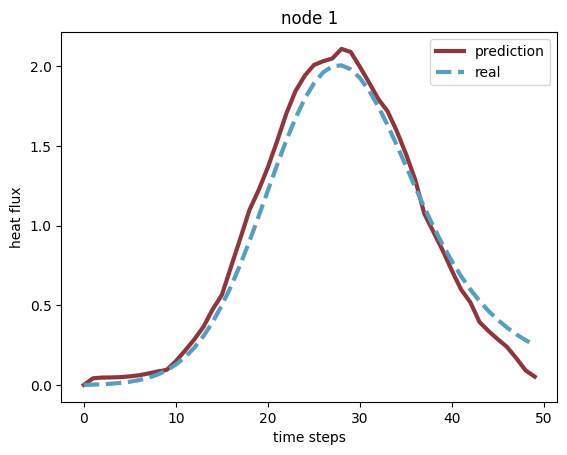

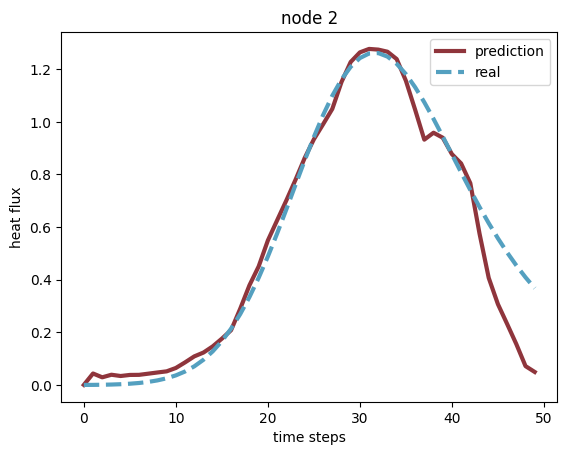

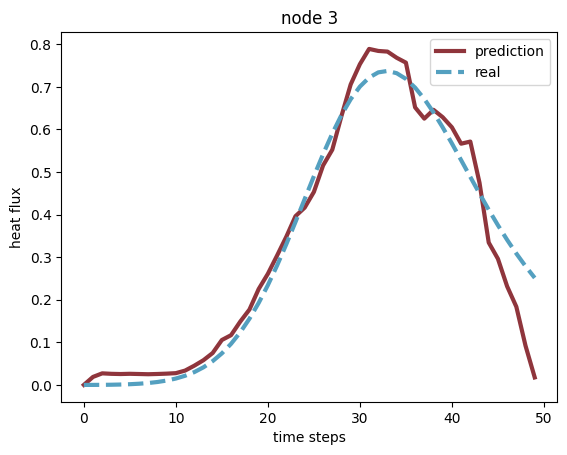

Rollout error :  [0.0721047]


In [9]:
# test the model on a single graph from the train or test set
split = 'train' # 'train' or 'test'
graph_idx = -1 # -1 for random graph, otherwise the index of the graph in the dataset

err = tester.plot_predictions(dataset, 'train', gnn_model, params, graph_idx=150)
print('Rollout error : ', err )

../data/graphs_new/


Loading graphs: 100%|██████████| 14/14 [00:00<00:00, 107.89it/s]


Compute statistics


flux: 100%|██████████| 13/13 [00:00<00:00, 3615.78it/s]


Normalize graphs


Add deltas: 100%|██████████| 13/13 [00:00<00:00, 7643.11it/s]


Compute statistics


dflux: 100%|██████████| 13/13 [00:00<00:00, 8427.50it/s]


Normalize graphs


Add features: 100%|██████████| 13/13 [00:00<00:00, 4977.72it/s]


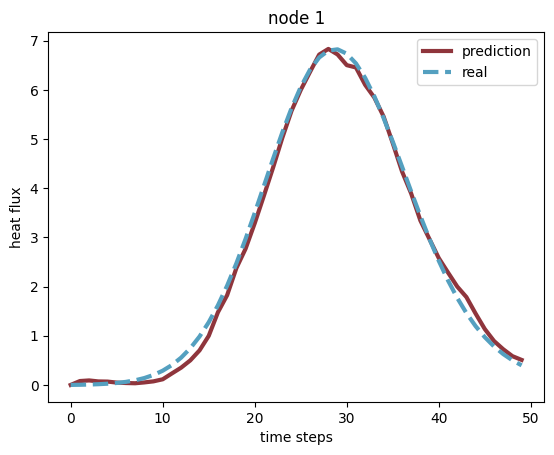

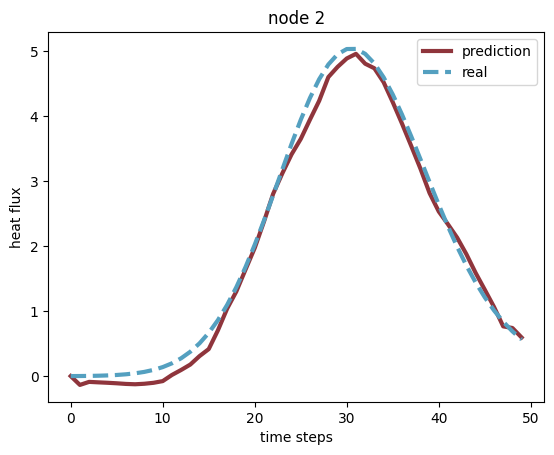

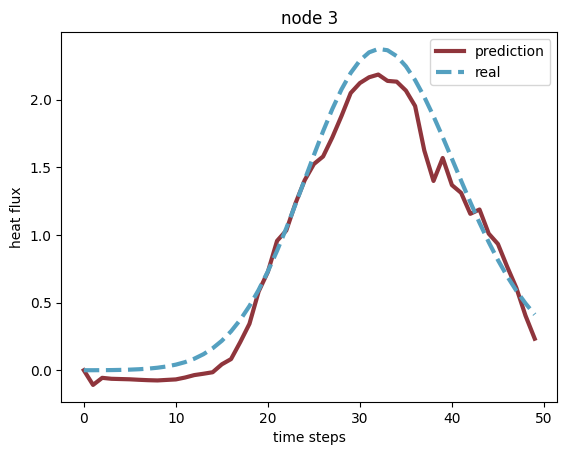

Rollout error :  [0.03849548]


In [5]:
# test the model on a new graph

graphs_folder = 'graphs_new/'
new_graph = 'k_58.04.grph'


err = tester.test_new_graphs(path, new_graph, graphs_folder = graphs_folder, data_location='../data/')
print('Rollout error : ', err)